<img src="https://www.buildofy.com/blog/content/images/2022/06/_DSC9610-Edited_-min.jpg" style="width:400px;height:250px;">

<div style="text-align: center;"> 
    <h2>PRICE PREDICTION OF PROPERTIES IN BANGALORE</h2>
</div>


The purpose of this notebook is to create an ML model for **price prediction of properties in Banglore** 
based on features like **bathroom, bhk, location etc.**
1. DATA CLEANING
2. MODEL TUNING, PARAMETER TUNING
3. EXPORTING THE MODEL

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_drqJ9SFCgU?si=adukcLIhrFYzRYvY&amp;start=308" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (20,10) #sets the plot/graph size to a default value-20inches wide by 10 inches tall

In [4]:
df1= pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg(['count'])
#I wanna group by area type and I wanna apply count() operation to the 'area type' column
#JUST TO CHECKOUT. NOT AN IMPORTANT OPERATION.

,count
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


# df2 created

In [7]:
df2= df1.drop(['area_type','availability','balcony', 'society'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isna().sum()
#location column has 1 empty cells
#size column has 1 empty cells
#bath column has 73 empty cells
#total_sqft & price columns has 0 empty cells

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

# df3 created

In [9]:
df3= df2.dropna() #drop all the 'na' values in df2 dataframe 
df3.isna().sum() #checking out if there are any null values in the new dataframe 'df3' 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
'''since u have dropped some rows, 
now check how many rows are there. earlier- 13,320 now= 13,246'''
df3.shape 

(13246, 5)

In [11]:
df3['size'].unique() #FUNCTION TO CHECK THE UNIQUE VALUES IN A COLUMN

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
'''looks into the 'size' column and takes each value 'x' 
and applies split method on the basis of space 2 BHK will 
be split into [2, BHK] and we are taking the num value alone
using the [0]th array'''

df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique() 
#now see the unique values that are there in the new 'bhk' column 
#surprising to see there are 43 bedrooms(outlier)

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>20]
#bedrooms upto a certain number are fine. 
#if there is beyond that then its outlier.
#lets find how many props have more than 20bdrms

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Its obviously an error
just 43 bedrooms and 2400 sqft??
An outlier for sure.
But to make sure. We need to find how much squarefeet does a 1 bedroom consume.
For that we need to ensure total_sqft column has proper values.

In [16]:
df3['total_sqft'].unique()  
#whenever u move onto a new column. check for unique values

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Although total_sqft appears like a numeric column. Always remember to apply is_float()
function on numeric columns to see if there are any non-numeric values like 
ranges, strings or something like that.

In [17]:
'''tries to convert a value into float. If not possible 
it returns False. otherwise returns True.'''
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In total_sqft column lets take avg for range values and lets ignore those unit values

In [19]:
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
            return float(x)
    except:
            return None
    

If 'x' is unable to be split into tokens then it will be taken care by the 'try' block

# df4 created

In [20]:
df4= df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(convert_sqft_to_num) #apply the function to the entire column
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## feature engineering(creation of an entirely new column for certain uses)

# df5 created

In [21]:
df5= df4.copy()
df5['price_per_sqft']= df4['price']*100000/ df4['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df5.location.unique())

1304

In [23]:
df5.location = df5.location.apply(lambda x: x.strip()) #to remove trailing and laging spaces
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
#I wanna group by location and I wanna apply count() operation to the 'location' column 
#& want the results in desc order
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats<=10]) 
#this will say how many values inside location_stats are less than or equal to 10

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
#these are the locations which has less than or equal to 10 properties

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
'''
TAKE THE VALUE x and make it as 'other' if x is there in 'location_stats_less_than_10' 
else keep it as x itself
'''
df5.location= df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [27]:
len(df5.location.unique())

242

# OUTLIER DETECTION

#### LETS REMOVE THE ROWS WHERE bhk DOESNT MAKE SENSE WITH THE total_sqft

#### U TALK WITH THE BUSINESS MANAGER AND HE SAYS 300sqft per bedroom is the typical threshold. SO ITS A GOOD DECISION TO REMOVE THOSE ROWS WHERE (total_sqft/bhk < 300)

In [28]:
df5[df5['total_sqft']/df5['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [29]:
df5.shape

(13246, 7)

# df6 created

In [30]:
df6 = df5[df5.total_sqft / df5.bhk >= 300]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


#### LETS REMOVE THE ROWS WHERE price_per_sqft DOESNT MAKE SENSE 
### TO GET ALL INFO ABOUT A PARTICULAR COLUMN USE describe() 

In [31]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## THE MEAN IS 6300. BUT THE MIN & MAX PRICES ARE 260 & 1,76,000. DOESNT MAKE SENSE AT ALL. THIS IS TOO BIG OF A DIFFERENCE. LETS FILTER OUT ANY PRICE THATS BEYOND 1 STANDARD  DEV. SOMETIMES U CAN HAVE UPTO 2 STD DEV.

# df7 created

In [32]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for location, location_df in df.groupby('location'):
        m=np.mean(location_df.price_per_sqft)
        std= np.std(location_df.price_per_sqft)
        reduced_df= location_df[(location_df.price_per_sqft > (m-std)) & (location_df.price_per_sqft <= (m+std))]
        df_out= pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7= remove_pps_outliers(df6)
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [33]:
df7.shape

(10241, 7)

NOW ITS TIME TO CHECK WHETHER IS THERE ANY ERROR WHERE
PRICE OF 2BHK > PRICE OF 3BHK FOR THE SAME LOCATION.

ITS SOMETHING THAT MIGHT BE EASY TO SOLVE IF WE 
VISUALISE IT IN A SCATTER PLOT.

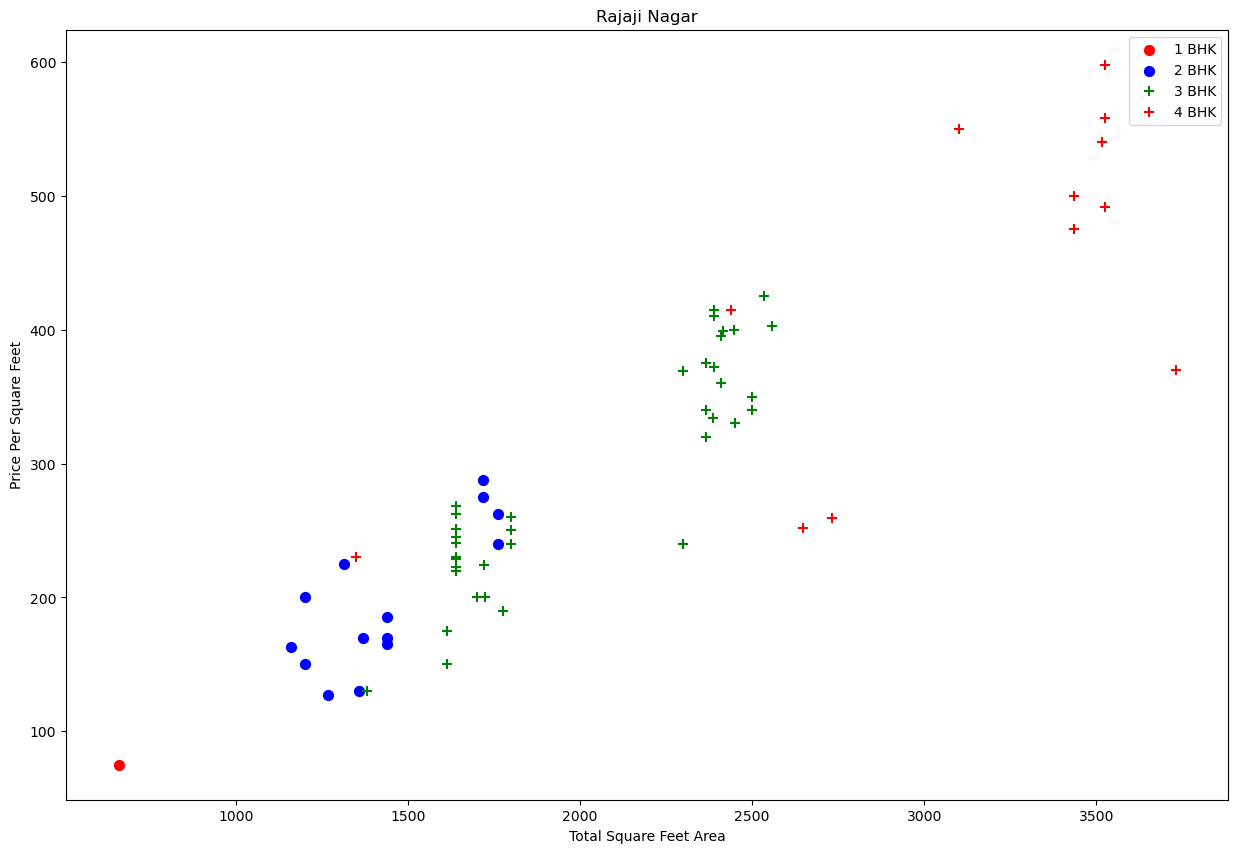

In [34]:
def plot_scatter_chart(df, location):
    bhk1 = df[(df.location==location) & (df.bhk==1)] #rows where location= RajajiNagar & bhk is 1
    bhk2 = df[(df.location==location) & (df.bhk==2)] #rows where location= RajajiNagar & bhk is 2
    bhk3 = df[(df.location==location) & (df.bhk==3)] #rows where location= RajajiNagar & bhk is 3
    bhk4 = df[(df.location==location) & (df.bhk==4)] #rows where location= RajajiNagar & bhk is 4
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk1.total_sqft, bhk1.price, color='red', label='1 BHK', s=50)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft, bhk4.price, marker='+', color='red', label='4 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
 
plot_scatter_chart(df7, "Rajaji Nagar")

## U CAN SEE CERTAIN CASES WHERE PRICE OF 2BHKs(blue dots) IS HIGHER THAN 3BHKs(green +)

### U CAN RUN THIS SAME plot_scatter_chart(df7, "Rajaji Nagar") FOR DIFFERENT LOCATIONS

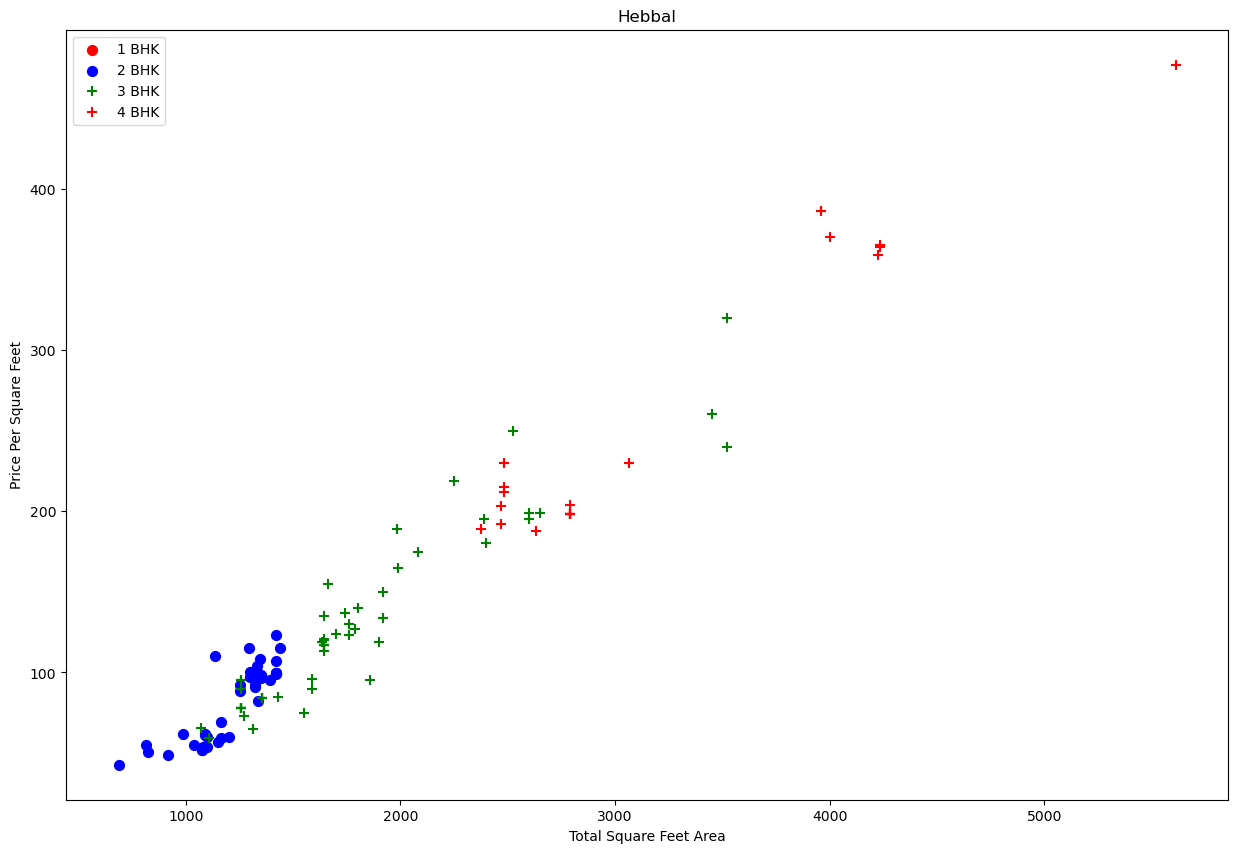

In [35]:
plot_scatter_chart(df7, "Hebbal")

## AGAIN U CAN SEE CERTAIN CASES WHERE PRICE OF 2BHKs(blue dots) IS HIGHER THAN 3BHKs(green +)

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


# df8 created

In [37]:
df8 = remove_bhk_outliers(df7)
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


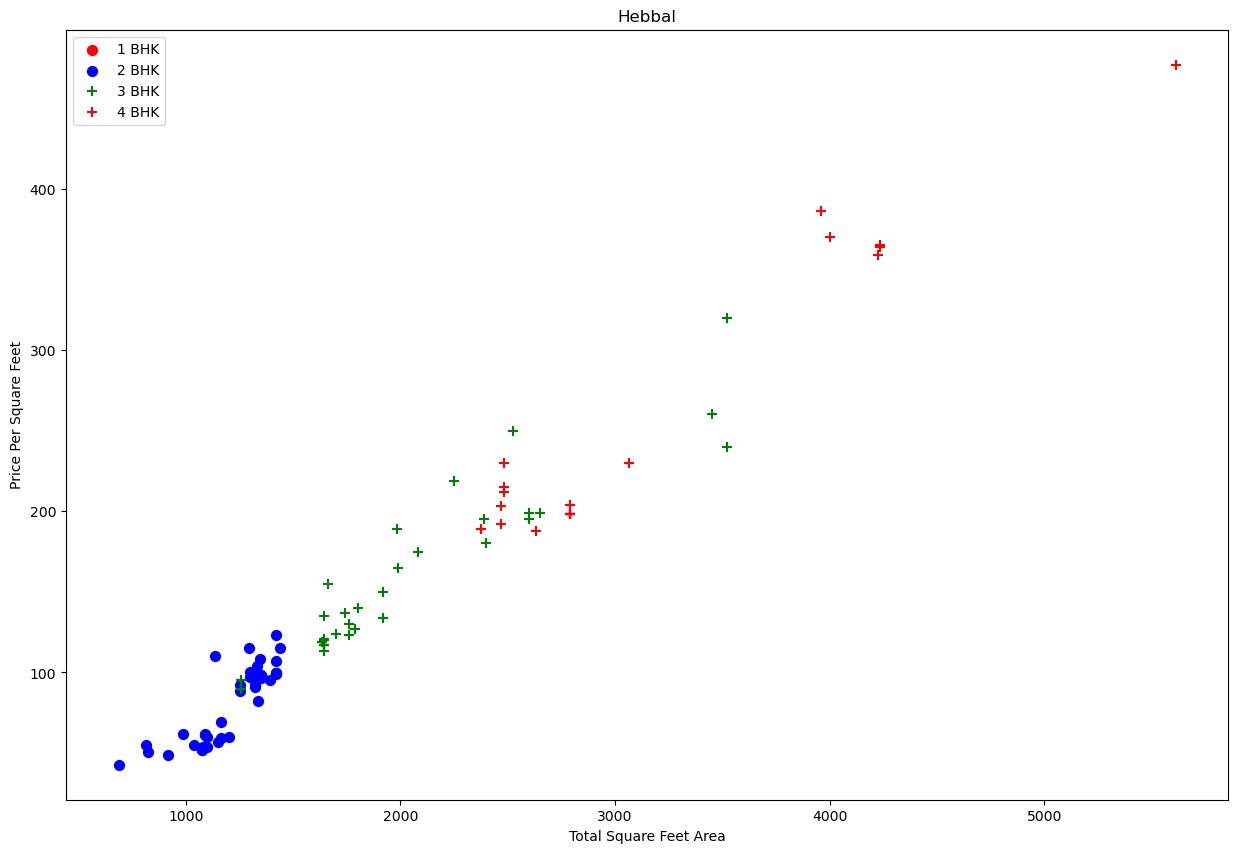

In [38]:
plot_scatter_chart(df8, "Hebbal") #OUTLIERS HAVE BEEN REMOVED

## NOW LETS MOVE ON TO BATHROOM COLUMN. AS USUAL LETS 1ST CHECK THE UNIQUE VALUES.

In [39]:
df8.bath.unique() #OMG 16 BATHROOMS IS HUGE.

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

### EVEN 2 BHK WITH 4 BATHROOMS IS UNUSUAL. ACC TO OUR BIZ MANAGER, IF NUM OF BATHROOMS IS 2+(NUM OF BHK) THEN THATS AN OUTLIER AND WE MUST REMOVE IT

LETS VISUALISE THE NUM OF BATHROOMS IN A HISTOGRAM

Text(0, 0.5, 'count')

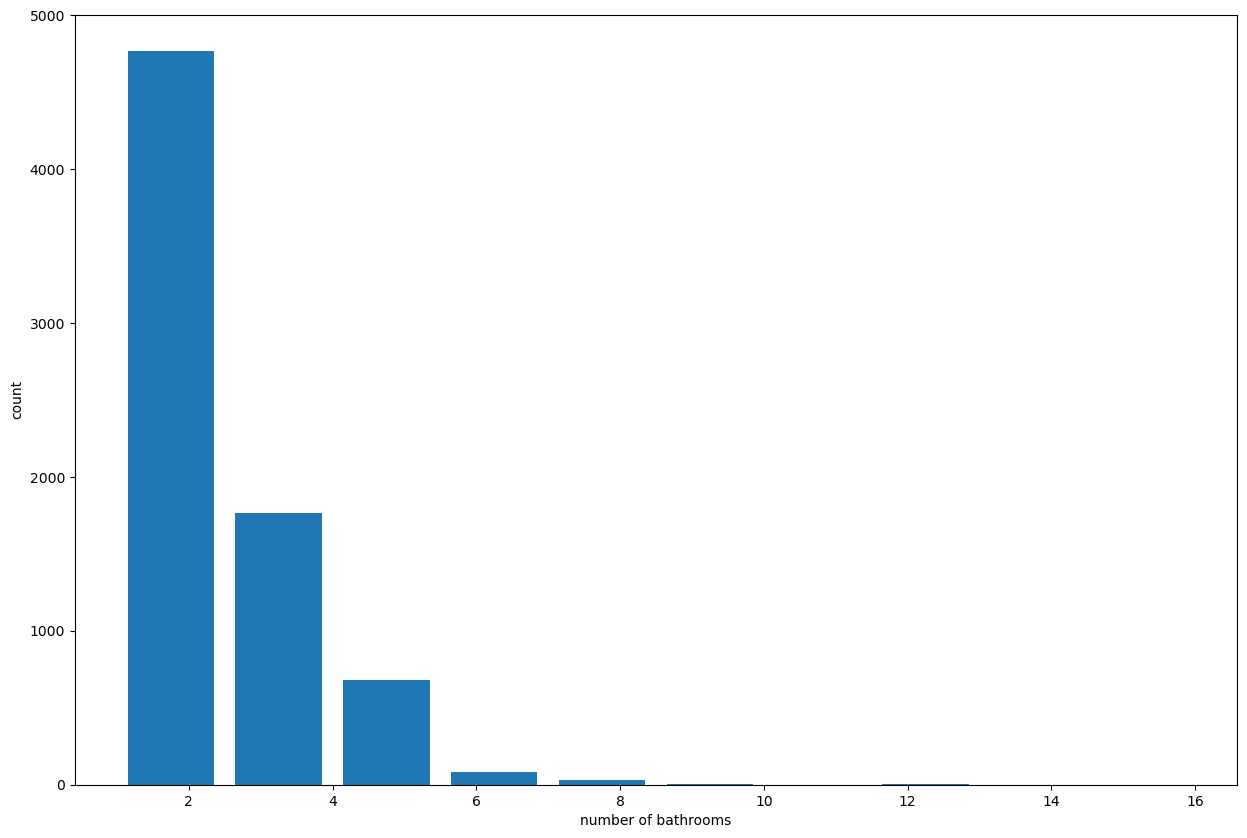

In [40]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

MAJORITY OF THE BATHROOMS ARE 2,3,5

In [41]:
df8[df8.bath > df8.bhk+2] #these are the rows that does not match our bathroom rule

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


# df9 created

In [42]:
df9= df8[df8.bath < df8.bhk+2]
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


## ALL OUTLIERS ARE REMOVED. NOW LETS REMOVE UNNECESSARY COLUMNS BEFORE DOING ONE HOT ENCODING.

# df10 created

In [43]:
df10= df9.drop(['size', 'price_per_sqft'], axis= 'columns')
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


## ITS TIME FOR THE LEGENDARY ONE HOT ENCODING. THE CLIMAX STEP BEFORE FINDING & TRAINING A MODEL

In [44]:
dummies = pd.get_dummies(df10['location'])
dummies = dummies.astype(int)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


now lets concat this location dummies column & our original dataframe df10

# df11 created

In [45]:
df11= pd.concat([df10,dummies.drop('other',axis='columns')] , axis='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# df12 created

In [46]:
df12= df11.drop('location', axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## OUR DATAFRAME IS READY. NOW LETS SPLIT THE DATA & THE LABEL(AKA TARGET)

In [47]:
X= df12.drop('price', axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y= df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

## SPLIT TEST & TRAIN DATA & TRY OUT DIFFERENT MODELS

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=30)

In [51]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8467965332398384

## THE ABOVE ONE IS NORMAL METHOD OF TESTING A MODEL. NOW LETS DO K-FOLD CROSS VALIDATION 

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

scores = cross_val_score(LinearRegression(), X, y, cv=cv)
scores

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [59]:
mean_score = np.mean(scores)
mean_score

0.8183540750696112

## But instead of doing this model testing as well as parameter tuning for each & every model. lets better go with GRIDSEARCHCV and test out LinearRegression, Lasso & DecisionTreeRegressor

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_GridSearchCV(X, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())
            ]),
            'params': {
                'linear_regression__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores= []
    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
            
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'linear_regression__fit_intercept': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.716091,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## NOW ITS TIME TO TEST OUR MODEL WITH OUR OWN DATA

## The model where we did simple linear_regression with train_test_split produced the best accuracy of 84%. So lets go with it. lr_clf was the object over there.

In [66]:
def predict_price(location,sqft,bath,bhk):
    loc_index= np.where(X.columns==location)[0][0]
    '''if only one [0], the result = [4]. 
    BUT when use use two [0][0], the result = 4.
    (it goes inside the array and picks the num)'''
    x= np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [67]:
predict_price('1st Phase JP Nagar',1000,2,2)

89.23636747309132

In [68]:
predict_price('1st Phase JP Nagar',1000,3,3)

91.77436113446744